# 概率

In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

## 1.抽取样本

抽取一个样本时传入一个概率向量，输出是另一个相同长度的向量，它在索引$i$处的值是采样结果中$i$出现的次数

In [4]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 1., 0., 0.])

In [5]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 6., 1., 0., 1., 1.])

In [6]:
counts = multinomial.Multinomial(10000, fair_probs).sample()
counts / 10000  # 相对频率作为估计值

tensor([0.1672, 0.1699, 0.1586, 0.1670, 0.1699, 0.1674])

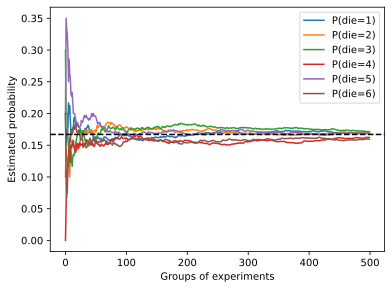

In [7]:
# 500组实验，每组抽取10个样本
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();